In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('/content/MusicData.xlsx')
df

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,NaN
1,CD,Units,1974,1,NaN
2,CD,Units,1975,1,NaN
3,CD,Units,1976,1,NaN
4,CD,Units,1977,1,NaN
...,...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


In [29]:
# Encontrando valores NaN
dfnan = df['Value (Actual)'].isna()
dfnan = df.loc[dfnan,:]
dfnan
# Se concluye que los valores NaN tienen que ver con formatos musicales que no estaban disponibles en dichos años con valores faltantes (por ej, CDs en los 70s) o que ya están obsoletos,
# por lo que puede que no hayan datos de ventas registradas en dichos años. Dado lo anterior, los valores NaN se reemplazarán con valores 0.
df['Value (Actual)'] = df['Value (Actual)'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Format             3008 non-null   object 
 1   Metric             3008 non-null   object 
 2   Year               3008 non-null   int64  
 3   Number of Records  3008 non-null   int64  
 4   Value (Actual)     3008 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 117.6+ KB


# **Elaborando gráficos relevantes para el análisis**

In [51]:
# Ventas históricas por plataforma
ventas_plataforma = df.groupby(['Format'])[['Value (Actual)']].sum().sort_values(by=['Value (Actual)'], ascending = False)
ventas_plataforma


,Value (Actual)
Format,
CD,525411.020874
Cassette,157208.102797
LP/EP,127648.807493
Download Single,45894.155285
Paid Subscription,42514.172157
8 - Track,30159.456657
Download Album,25107.065337
Vinyl Single,22055.175245
Music Video (Physical),18437.062493


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


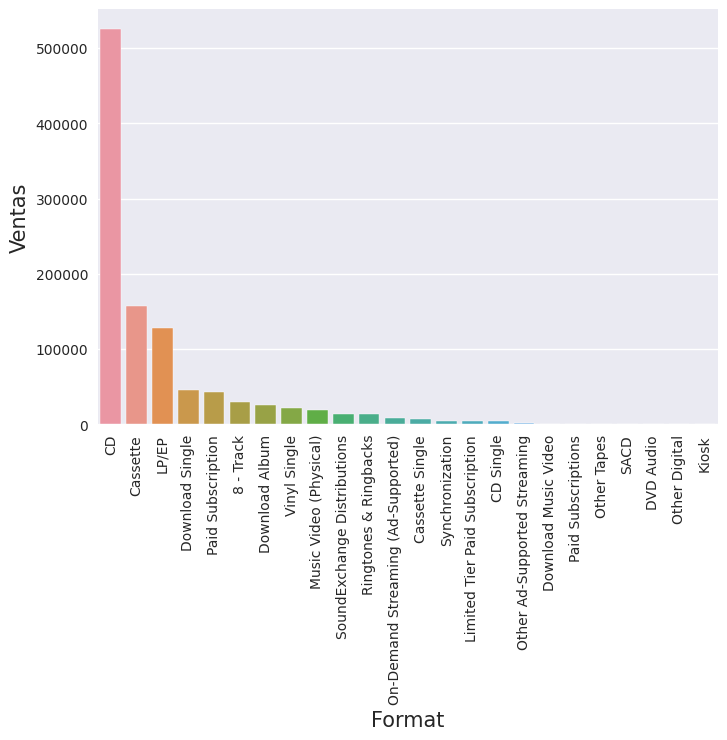

In [52]:
# Estableciendo valores eje x e y
plataformas = ventas_plataforma.index.unique()
ventas = ventas_plataforma['Value (Actual)'].unique()
# Tamanio del grafico
plt.figure(dpi=100)

sns.set_style('darkgrid')

x = plataformas
y = ventas

 
plt.xlabel('Plataforma', fontsize = 15)
plt.ylabel('Ventas', fontsize = 15)
sns.barplot(x, y)
plt.xticks(rotation = 90);
plt.show()

In [32]:
colores = sns.color_palette("Paired") + sns.color_palette("tab10") + sns.color_palette("Set2")


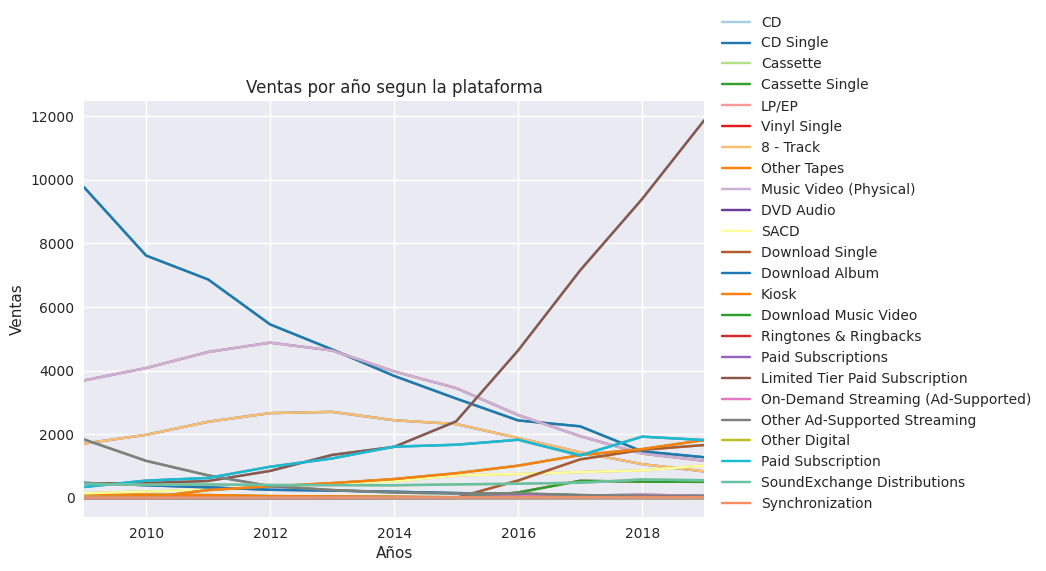

In [34]:
# Ventas por plataforma en los últimos 10 años de la data (2009 - 2019)
df1 = df['Year'] >= 2009
df1 = df.loc[df1,:]
ventas_top10 = df1.groupby(['Format', 'Year'])[['Value (Actual)']].sum()
ventas_top10 = ventas_top10.reset_index(level=['Format'])

years = ventas_top10.index.unique()
formatos = ventas_top10['Format'].unique()
formatos1 = df['Format'].unique()

plt.figure(dpi=100)
plt.style.use('seaborn')
sns.set_style('darkgrid')

def plataforma(lista):
  for i in range(0,len(lista),1):
    filtroplot = ventas_top10['Format'] == str(lista[i])
    lista[i] = ventas_top10.loc[filtroplot, :]
    plt.plot(years, lista[i]['Value (Actual)'])
    plt.plot(lista[i]['Value (Actual)'], color=colores[i], label=(formatos1[i]))
    plt.legend()
    plt.xlabel('Años')
    plt.ylabel('Ventas')
    plt.xlim(left=2009,right=2019)
    plt.title('Ventas por año segun la plataforma')
    plt.legend(loc=(1.02,0))
    plt.grid()
  plt.show()
  

plataforma(formatos)

In [48]:
# Ganancias por plataforma durante el ultimo año del dataset (2019), ordenadas de mayor a menor
  # Elaborando filtros
df2 = df['Year'] == 2019
df2 = df.loc[df2,:]
ventas_2019 = df2.groupby(['Format'])[['Value (Actual)']].sum()
ventas_2019 = ventas_2019.sort_values(by=['Value (Actual)'], ascending = False).head()
ventas_2019

,Value (Actual)
Format,
Paid Subscription,11868.795250
SoundExchange Distributions,1816.400000
On-Demand Streaming (Ad-Supported),1816.298661
Limited Tier Paid Subscription,1658.997479
CD,1275.526055


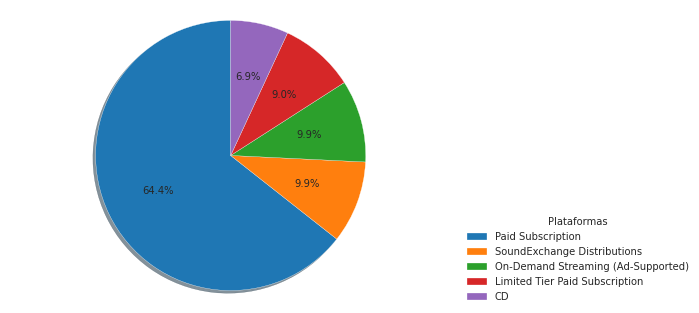

In [36]:
# Elaborando grafico
labelspie1 = ventas_2019.index
sizespie1 = ventas_2019['Value (Actual)'].values

colors = sns.color_palette('tab10')

fig1, ax1 = plt.subplots()
ax1.pie(sizespie1, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)
ax1.axis('equal')
plt.legend(title="Plataformas", loc=(1.02,0), labels = labelspie1)



plt.show()

In [37]:
# Las 5 plataformas con mas ganancias durante el año mas antiguo del dataset (1973)
  # Elaborando filtros
df3 = df['Year'] == df['Year'].min()
df3 = df.loc[df3,:]
ventas_1973 = df3.groupby(['Format'])[['Value (Actual)']].sum().head()
ventas_1973 = ventas_1973.sort_values(by=['Value (Actual)'], ascending = False).head()
ventas_1973

,Value (Actual)
Format,
8 - Track,3395.681824
Cassette,528.611081
CD,0.000000
CD Single,0.000000
Cassette Single,0.000000


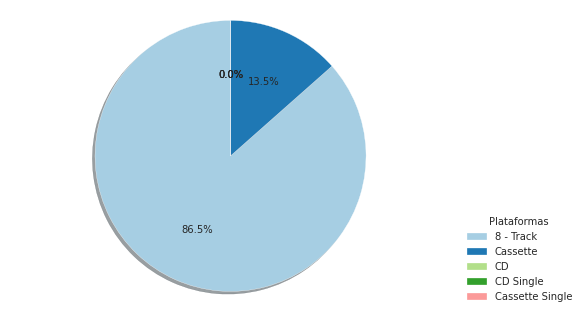

In [38]:
# Elaborando grafico
labels = ventas_1973.index
labelspie2 = ventas_1973.index
size = ventas_1973['Value (Actual)'].values
sizespie2 = ventas_1973['Value (Actual)'].values

colors = sns.color_palette('Paired')

fig1, ax1 = plt.subplots()
ax1.pie(sizespie2, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)
ax1.axis('equal') 
plt.legend(title="Plataformas", loc=(1.02,0), labels=labelspie2)

plt.show()